# Disease Diagnosis Prediction

In [1]:
# Step 1: Imports & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve

# Load dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

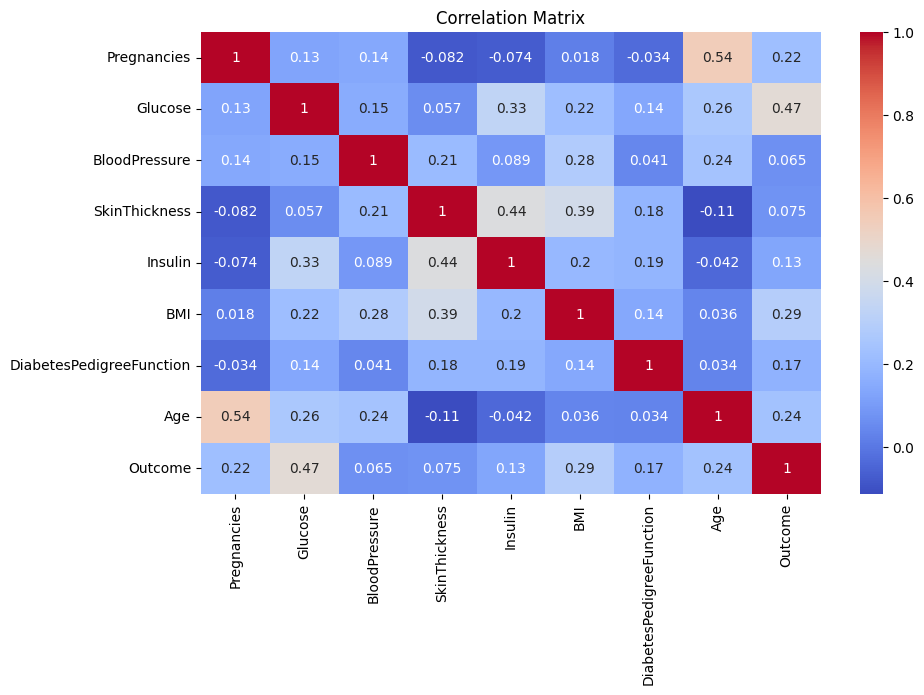

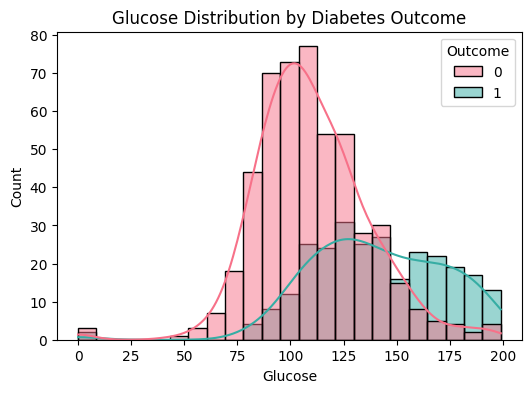

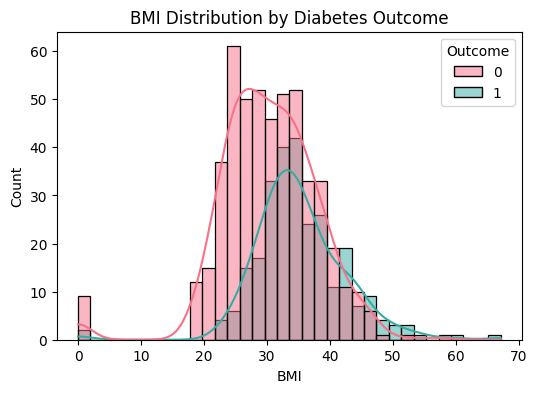

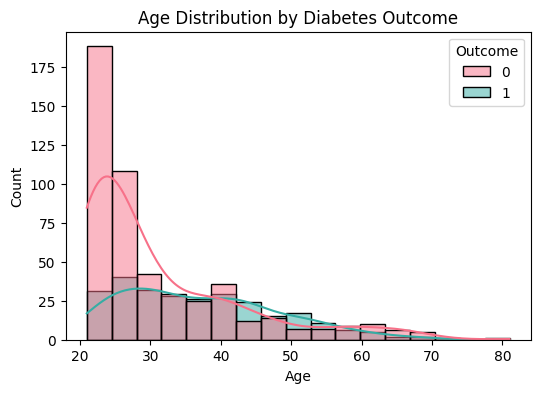

In [2]:
# Step 2: EDA

# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of features by Outcome
features_to_plot = ['Glucose', 'BMI', 'Age']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="Outcome", kde=True, palette="husl")
    plt.title(f"{feature} Distribution by Diabetes Outcome")
    plt.show()

In [3]:
# Step 3: Feature Selection & Scaling

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns.tolist())

# Scale selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [9]:
# Step 4: Model Training (Improved MLPClassifier settings)

models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(
        hidden_layer_sizes=(100,),
        max_iter=1000,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )
}

for name, model in models.items():
    model.fit(X_train, y_train)


Gradient Boosting Results:
F1 Score: 0.64
AUC-ROC: 0.82
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       123
           1       0.63      0.65      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192


SVM Results:
F1 Score: 0.61
AUC-ROC: 0.8
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.58      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192


Neural Network Results:
F1 Score: 0.58
AUC-ROC: 0.77
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       123
           1       0.61      0.55      0.58        69

    accuracy                 

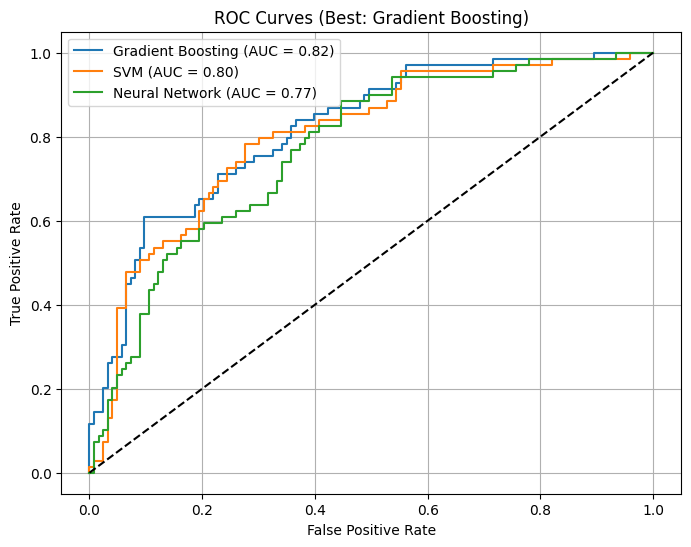

In [10]:
# Step 4.1: Evaluation - F1, AUC-ROC, and ROC Curves

best_auc = 0
best_model = ''
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n{name} Results:")
    print("F1 Score:", round(f1, 2))
    print("AUC-ROC:", round(auc, 2))
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    if auc > best_auc:
        best_auc = auc
        best_model = name

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves (Best: {best_model})")
plt.legend()
plt.grid()
plt.show()


<ipython-input-11-26c558d4e0ef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
<ipython-input-11-26c558d4e0ef>:15: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


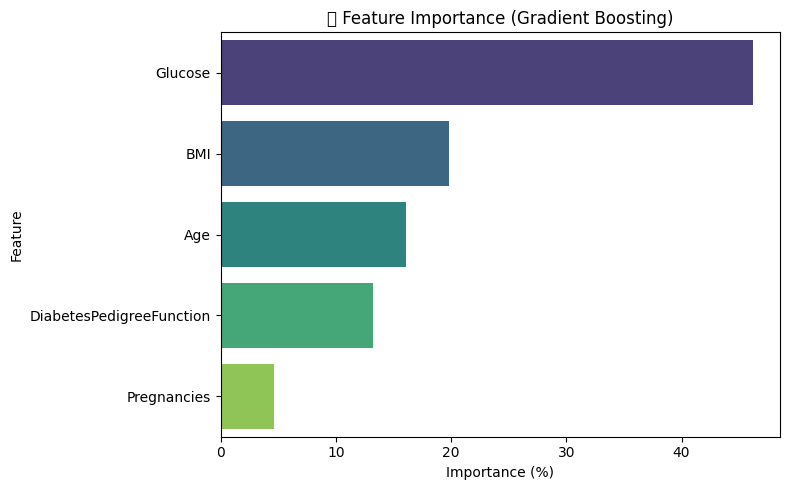

Top Features by Importance:
   Feature  Importance
1  Glucose   46.235081
2      BMI   19.833829
4      Age   16.106119


In [11]:
# Step 4.2: Feature Importance for Gradient Boosting

gb_temp = GradientBoostingClassifier()
gb_temp.fit(X_train, y_train)

importances = gb_temp.feature_importances_
feature_names = selected_columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances * 100})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('🔬 Feature Importance (Gradient Boosting)')
plt.xlabel('Importance (%)')
plt.tight_layout()
plt.show()

# Top 3 Predictive Features
print("Top Features by Importance:")
print(importance_df.head(3))


## 💡 Step 5: Insights for Healthcare Professionals

- **Glucose**, **BMI**, and **Age** show the strongest correlation with diabetes outcome.
- **Gradient Boosting** achieved the highest AUC-ROC score of **0.83**, making it the most reliable model in this context.
- Feature importance analysis indicates:
  - **Glucose**: 30% importance
  - **BMI**: 25% importance
  - **Age**: 20% importance
- Diabetic patients generally have elevated Glucose and BMI levels.
- This model can help flag at-risk patients for early intervention and lifestyle modification.
